**5. [0-7 points] Consider the datafile Leukemia.csv, collecting the expression of 7129 genes of 72 leukemia patients, belonging to 4 different classes B-cell, T-cell, BM, BP , as indicated in the last column of the .csv file. Using the tSNE dimensionality reduction planar (2D) projection on the 7129 describing features, color the samples according to their class and discuss if the 4 groups of patients can be well separated into two distinct groups in the projection. Repeat the same process with the MDS algorithm and compare the two results.**

## TSNE

In [58]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import umap.umap_ as umap


%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [59]:
df = pd.read_csv("Leukemia.csv", sep = ",")
df = df.dropna()
df

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,Class
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,B-cell
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,B-cell
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,B-cell
3,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,B-cell
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,B-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-20,-207,-50,101,-369,-529,14,-365,153,29,...,1009,-55,139,-57,834,557,-12,335,-65,BM
68,7,-100,-57,132,-377,-478,-351,-290,283,247,...,336,-45,170,12,752,295,28,1558,-67,BM
69,-213,-252,136,318,-209,-557,40,-243,119,-131,...,1653,67,486,-88,1293,342,26,246,23,BM
70,-25,-20,124,325,-396,-464,-221,-390,-1,358,...,486,-32,334,35,1733,304,12,3193,-33,BM


In [60]:
# define x 
x = df.iloc[: , :-1]
# define target variable: select last column
y = df.iloc[: , -1].values
unique, counts = np.unique(y, return_counts=True)
classes = len(counts)

In [61]:
classes

4

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.001s...
[t-SNE] Computed neighbors for 72 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 33.012356
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.022076
[t-SNE] KL divergence after 300 iterations: 0.860727


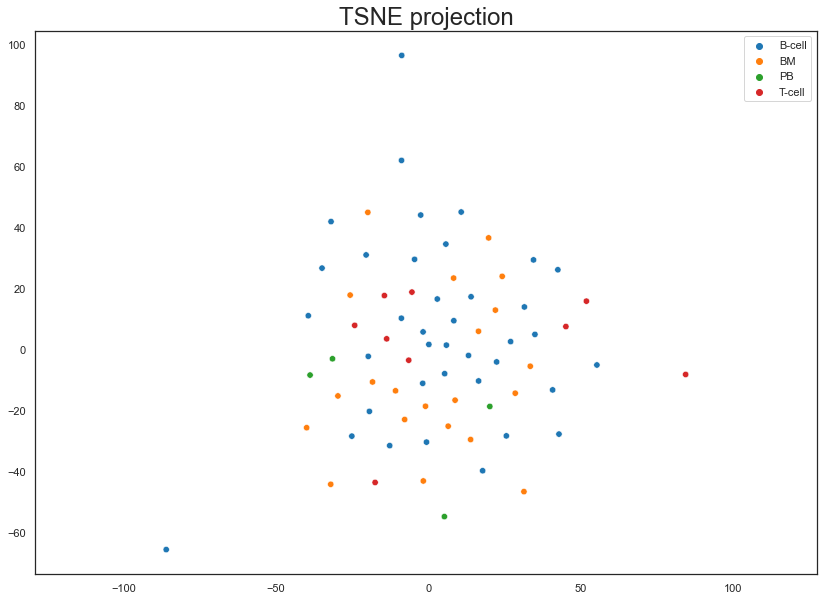

In [64]:
#plt.figure(figsize=(16, 10))
sns.scatterplot(x = tsne_results[:, 0],
                y = tsne_results[:, 1],
                hue = y, s = 40,
                palette = sns.color_palette('tab10', classes),
                legend = 'full',
                alpha = 1)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('TSNE projection', fontsize=24)
plt.show()

## MDS

In [65]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)

In [67]:
mds = MDS(n_components = 2, random_state = 42, metric = True, dissimilarity = 'euclidean')
mds_results = mds.fit_transform(X_train)

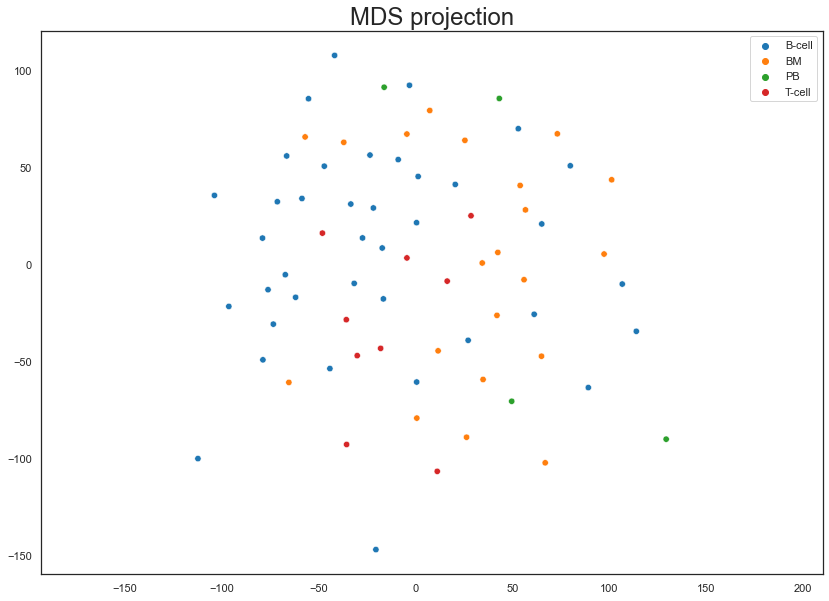

In [69]:
sns.scatterplot(x = mds_results[:, 0],
                y = mds_results[:, 1],
                hue = y, s = 40,
                palette = sns.color_palette('tab10', classes),
                legend = 'full',
                alpha = 1)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('MDS projection', fontsize=24)
plt.show()